c:\Users\Bogdan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bogdan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


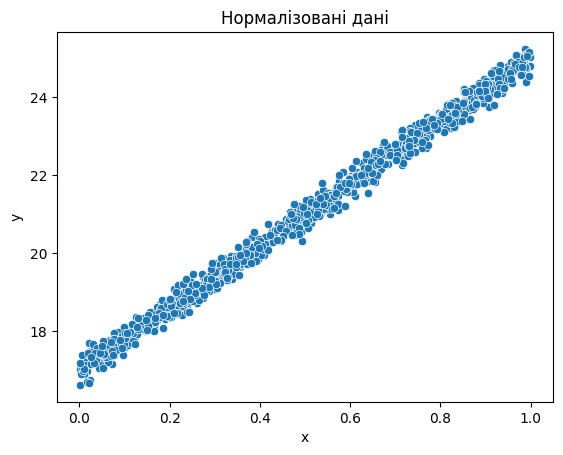

In [134]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

n = 1000 
x = np.random.rand(n) 
y = 8 * x + 17 + np.random.randn(n) * 0.2
df = pd.DataFrame({"x":x,"y":y})
X_normalized = (x - np.mean(x)) / np.std(x)
sns.scatterplot(x=df['x'],y=df['y'])
plt.title("Нормалізовані дані")
plt.show()

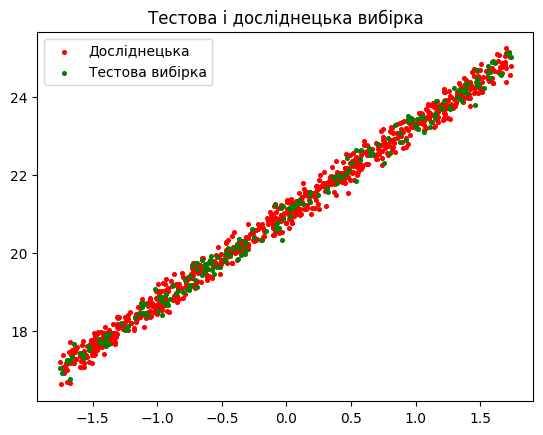

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized.reshape(-1, 1), y, test_size=0.2)
plt.scatter(X_train, y_train, s = 7, color='r', label='Досліднецька')
plt.scatter(X_test, y_test, s = 7, color='g', label='Тестова вибірка')
plt.title('Тестова і досліднецька вибірка')
plt.legend()
plt.show() 


In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def draw(x, y, x_sorted, y_sorted, name, k, r_squared, mse):
    plt.figure(figsize=(5, 5))
    plt.plot(x_sorted, y_sorted, linewidth=0.9, color='red', label='Регресія')
    plt.scatter(x, y, s=10, label=f'{name} вибірка')
    plt.legend()
    plt.title(f"Лінія регресії при k = {k}\n{name} вибірка")
    plt.grid(True)
    plt.show()
    print(f"\t{name} вибірка")
    print(f"Коефіцієнт детермінації: {r_squared}")
    print(f"Середньоквадратична похибка: {mse}")

def knn_regression(k, X, y, name):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X.reshape(-1, 1))
    
    # Обрахунок похибок
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)

    sorted_indices = X.squeeze().argsort()
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    
    # Вивід графіків
    draw(X, y, X_sorted, y_pred_sorted, name, k, r_squared, mse)
    
    return [mse, r_squared, k]


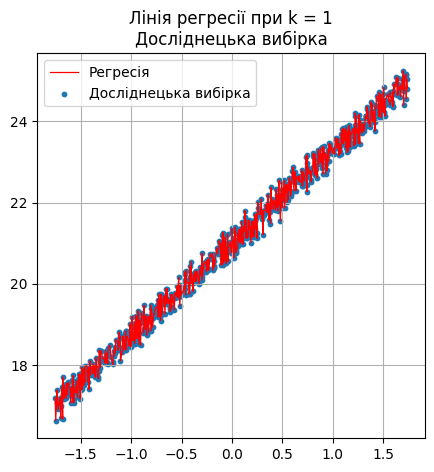

	Досліднецька вибірка
Коефіцієнт детермінації: 1.0
Середньоквадратична похибка: 0.0


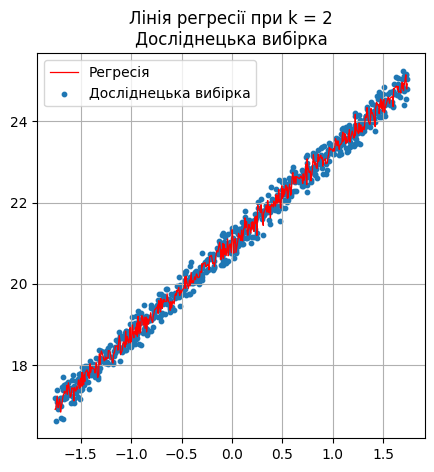

	Досліднецька вибірка
Коефіцієнт детермінації: 0.9960590502839444
Середньоквадратична похибка: 0.0204595567092515


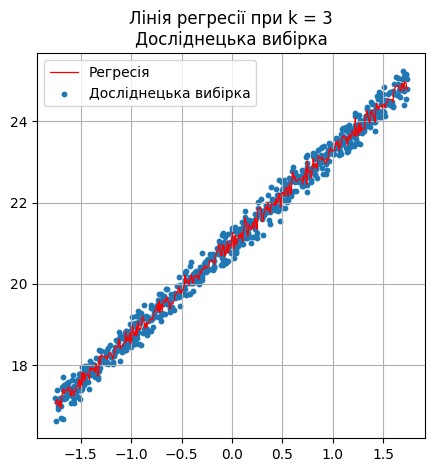

	Досліднецька вибірка
Коефіцієнт детермінації: 0.9948279211109552
Середньоквадратична похибка: 0.02685100012923912


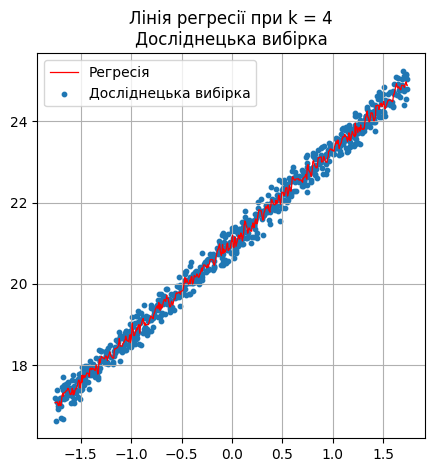

	Досліднецька вибірка
Коефіцієнт детермінації: 0.9941893307596338
Середньоквадратична похибка: 0.030166260776593238


In [137]:
error_results_train = [
    knn_regression(k, X_train, y_train, "Дослінецька") for k in range(1, 5)
]

In [138]:
error_results_df_train = pd.DataFrame(error_results_train, columns=['Середн.квадр. похибка', 'Коеф. детермінації', 'К-сть сусідів'])
print("Дослідницька вибірка:")
display(error_results_df_train)

Дослідницька вибірка:


,Середн.квадр. похибка,Коеф. детермінації,К-сть сусідів
0,0.000000,1.000000,1
1,0.020460,0.996059,2
2,0.026851,0.994828,3
3,0.030166,0.994189,4


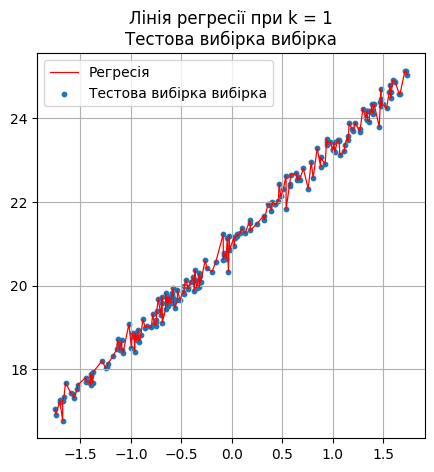

	Тестова вибірка вибірка
Коефіцієнт детермінації: 1.0
Середньоквадратична похибка: 0.0


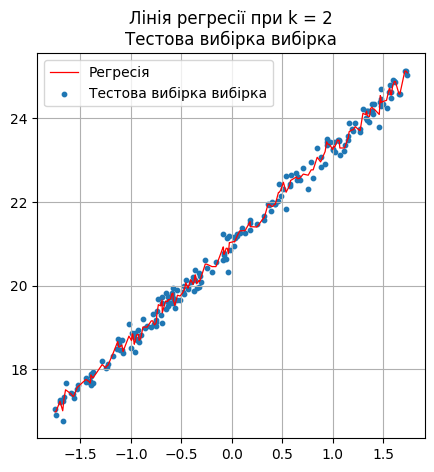

	Тестова вибірка вибірка
Коефіцієнт детермінації: 0.9968678130280297
Середньоквадратична похибка: 0.016884852586800014


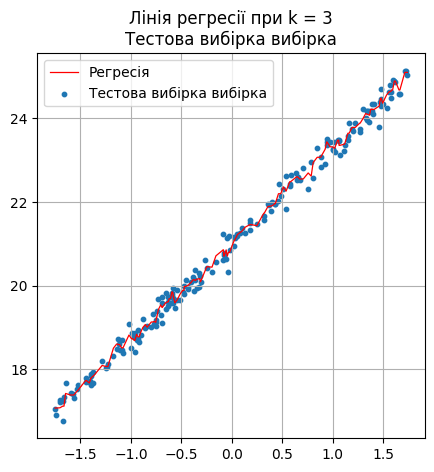

	Тестова вибірка вибірка
Коефіцієнт детермінації: 0.995159028939269
Середньоквадратична похибка: 0.026096488960871644


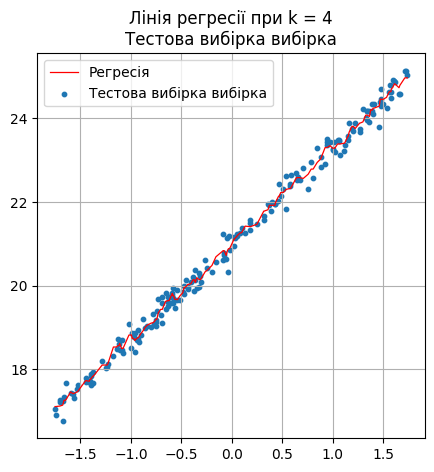

	Тестова вибірка вибірка
Коефіцієнт детермінації: 0.9946983633889828
Середньоквадратична похибка: 0.028579824080392884


In [139]:
error_results_test = [
    knn_regression(k, X_test, y_test, "Тестова вибірка") for k in range(1, 5)
]

In [140]:
error_results_df_train = pd.DataFrame(error_results_train, columns=['Середн.квадр. похибка', 'Коеф. детермінації', 'К-сть сусідів'])
print("Тестова вибірка:")
display(error_results_df_train)

Тестова вибірка:


,Середн.квадр. похибка,Коеф. детермінації,К-сть сусідів
0,0.000000,1.000000,1
1,0.020460,0.996059,2
2,0.026851,0.994828,3
3,0.030166,0.994189,4
